# Maunally Computing....
> Maunally computing, the Boomer way - if boomers coder in 🅱ython

Adapted from [harsh14796's project](https://github.com/harsh14796/Stock-Market-Analysis-With-Python) amoung other sources


In [14]:
from utils import get_data, normalize_data, zero_shift, daily_returns, daily_change

import numpy as np
import pandas as pd

# !pip install yfinance networkx
import yfinance as yf

# multiple outputs per cells. does not mix well with plt as they return stull that will be printed
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import datetime

import seaborn as sns
import matplotlib.pyplot as plt

# defaults for plt
%matplotlib inline
plt.style.use('fivethirtyeight')                # first, small enchancements, xlabels, ylabels, legand sizing...   
plt.rcParams['lines.linewidth'] = 2             # Change linewidth of plots
plt.rcParams['figure.figsize'] = (12, 8)        # Change the size of plots
  
start = datetime.datetime(2016,1,1)
# start = datetime.datetime(2018, 2, 1)
# end = datetime.datetime(2020, 9, 13)
end = datetime.date.today()

In [2]:
tickers = ['SPY', 'QQQ', 'XIU.TO', 'AAPL', 'AMZN']
df = get_data(tickers, end=end, drop_na=True)

df.head(3)
df.tail(3)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
shape of the dataframe: (8270, 5)
shape of the dataframe - after droping NA: (5576, 5)


,XIU.TO,AAPL,AMZN,SPY,QQQ
Date,,,,,
1999-10-04,6.185672,0.492876,77.0625,86.591599,53.258965
1999-10-05,6.141115,0.518641,78.4375,86.508827,53.637474
1999-10-06,6.178243,0.512915,82.4375,87.833344,54.712112


,XIU.TO,AAPL,AMZN,SPY,QQQ
Date,,,,,
2022-05-18,30.879999,140.820007,2142.250000,391.859985,291.140015
2022-05-19,30.950001,137.350006,2146.379883,389.459991,289.579987
2022-05-20,31.010000,137.589996,2151.820068,389.630005,288.679993


Normalizing data... `(data - data.min()) / (data.max() - data.min())`
Ensure each column starts at 0 `data-data.iloc[0]`


<AxesSubplot:xlabel='Date'>

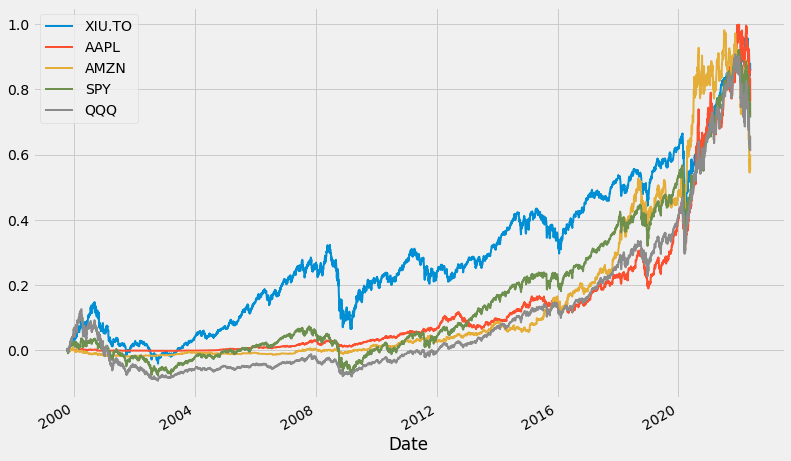

In [3]:
df = normalize_data(df)
df = zero_shift(df)
df.plot() # linewidth=2

In [4]:
print(f'Standard Deviation')
pd.DataFrame(df.std(), columns=['STD']).T

print(f'Covariance')
df.cov()

print(f"Pearson's Correlation")
df.corr()

print(f"Spearman's Correlation")
from scipy.stats import spearmanr
pd.DataFrame(spearmanr(df)[0], columns=df.columns, index=df.columns)

Standard Deviation


,XIU.TO,AAPL,AMZN,SPY,QQQ
STD,0.226099,0.215988,0.257936,0.234102,0.226338


Covariance


,XIU.TO,AAPL,AMZN,SPY,QQQ
XIU.TO,0.051121,0.043589,0.051764,0.050676,0.046752
AAPL,0.043589,0.046651,0.053606,0.048397,0.047777
AMZN,0.051764,0.053606,0.066531,0.058236,0.057146
SPY,0.050676,0.048397,0.058236,0.054804,0.052159
QQQ,0.046752,0.047777,0.057146,0.052159,0.051229


Pearson's Correlation


,XIU.TO,AAPL,AMZN,SPY,QQQ
XIU.TO,1.000000,0.892575,0.887592,0.957410,0.913583
AAPL,0.892575,1.000000,0.962220,0.957155,0.977311
AMZN,0.887592,0.962220,1.000000,0.964431,0.978852
SPY,0.957410,0.957155,0.964431,1.000000,0.984391
QQQ,0.913583,0.977311,0.978852,0.984391,1.000000


Spearman's Correlation


,XIU.TO,AAPL,AMZN,SPY,QQQ
XIU.TO,1.000000,0.975366,0.948457,0.961693,0.910335
AAPL,0.975366,1.000000,0.972080,0.937966,0.901455
AMZN,0.948457,0.972080,1.000000,0.916621,0.907924
SPY,0.961693,0.937966,0.916621,1.000000,0.960976
QQQ,0.910335,0.901455,0.907924,0.960976,1.000000


In [5]:
df_daily_returns = daily_returns(df)
df_daily_returns.head(3)

,XIU.TO,AAPL,AMZN,SPY,QQQ
Date,,,,,
1999-10-06,0.166743,0.777758,3.909091,-15.002120,3.839132
1999-10-07,-3.997946,0.690488,1.906977,0.599977,0.911625
1999-10-08,2.499968,0.551693,1.189024,2.777882,1.433675


## Simple Uniform allocation

In [6]:
annual_returns = (((df_daily_returns.mean()+1)**250)-1)
weights_uniform = np.array([0.20, 0.20, 0.20, 0.20, 0.20])
pfolio_uniform = np.dot(annual_returns, weights_uniform)
print(f"Annual Return: {pfolio_uniform*100:.2f}%")

Annual Return: 947766849136331624911128877898936801519480697698185127593611187046219882954752.00%


In [7]:
weights_1 = np.array([0.4, 0.05, 0.20, 0.05, 0.3])
pfolio_1 = np.dot(annual_returns, weights_1)
print(f"Annual Return: {pfolio_1*100:.2f}%")

Annual Return: 1401535778757777503501546074591574776347271483332714916624934610551112455946240.00%


## Portfolio Variance
> probably wrong... 

* [source](https://github.com/harsh14796/Stock-Market-Analysis-With-Python/blob/master/Div_non-div_risk.ipynb)
* [math background](https://www.northerntrust.com/documents/white-papers/asset-management/minimum-variance-portfolios.pdf?bc=23500800)



In [8]:
# might need to be `log(df_daily_returns)`
pfolio_var = np.dot(weights_uniform.T, np.dot(df_daily_returns.cov() * 250, weights_uniform)) # weights.T @ (df_daily_returns.cov() * 250) @ weights
print(f"Portfolio Variance: {pfolio_var*100:.2f}%")

Portfolio Variance: 103431.80%


In [9]:
# Diversifiable risk
variance_vector = df_daily_returns.var().to_numpy() # np.diag(df_daily_returns.cov())
non_diversifiable_risk = np.dot(weights_uniform**2, variance_vector.T) # np.sum([variance_vector[i] * weights[i] ** 2 for i in range(len(weights))])

# Expected portfolio Volatility (std) = SQRT (WT * (Covariance Matrix) * W)
portfolio_variance = weights_uniform@df_daily_returns.cov()@weights_uniform # same as non_diversifiable_risk
portfolio_voltilt = np.sqrt(weights_uniform@df_daily_returns.cov()@weights_uniform)

print(f"Portfolio Standard Deviation: {portfolio_voltilt*100:.2f}%")
print(f"Diversifiable risk (Variance): {pfolio_var-non_diversifiable_risk*100:.2f}%")
print(f"Non diversifiable risk:        {non_diversifiable_risk*100:.2f}%")

Portfolio Standard Deviation: 203.40%
Diversifiable risk (Variance): 620.61%
Non diversifiable risk:        413.71%


## Beta

In [10]:
# Variance with SPY
print('Variance with SPY')
var = df_daily_returns.cov()*200 # not sure if `*200` is correct
var = var['SPY']
var.to_frame()

# Betas of all stocks. cov_with_market / market_var
print('Betas')
(var/var['SPY']).to_frame()

Variance with SPY


,SPY
XIU.TO,1.795009
AAPL,0.400775
AMZN,-3.243695
SPY,374.063311
QQQ,0.592368


Betas


,SPY
XIU.TO,0.004799
AAPL,0.001071
AMZN,-0.008672
SPY,1.000000
QQQ,0.001584


In [11]:
# Beta from normalized prices (not daily returns)
var = df.cov()*200
var = var['SPY']
betas = var/var['SPY']
betas

XIU.TO    0.924680
AAPL      0.883094
AMZN      1.062620
SPY       1.000000
QQQ       0.951743
Name: SPY, dtype: float64

In [12]:
# Beta (5Y Daily) from normalized prices (not daily returns)

# var = df.resample('M').mean().last("5Y").cov()*200
var = df.last("5Y").cov()*200
var = var['SPY']
betas = var/var['SPY']
betas

XIU.TO    0.808969
AAPL      1.420180
AMZN      1.025984
SPY       1.000000
QQQ       1.173603
Name: SPY, dtype: float64

## Common Ratios

In [23]:
#Risk free return
RFR = 0.00 #0.02/250 # 0.00

In [24]:
df_recent = df.resample('M').mean().last("5Y")
df_recent = daily_change(df_recent)
sharpe_ratio = ((df_recent.mean()-RFR)/df_recent.std()) * np.sqrt(250)

print(f'Sharpe Ratios:')
pd.DataFrame(sharpe_ratio, columns=['Sharpe Ratio'])

Sharpe Ratios:


,Sharpe Ratio
XIU.TO,3.341112
AAPL,5.743335
AMZN,2.883062
SPY,3.733702
QQQ,4.499077


## Minimum Variance Portfolio


In [ ]:
assert pd.DataFrame(np.linalg.inv(df.cov()) @ df.cov()).round(4).sum().all() == 1
# hence a real? inverse of the covariance matrix exists and we dont have to have faith in pinv working

inv = np.linalg.inv(df.cov())
ones = np.ones(inv.shape[0])
weights = (inv @ ones) / (ones @ inv @ ones) 

print(f'Weights: {weights}, which sum to {weights.sum():.2f}')

pfolio = np.dot(annual_returns, weights)
print(f"Annual Return: {pfolio*100:.2f}%")
print(f"Annual Return of uniform weighting: {pfolio_uniform*100:.2f}%")

Weights: [-2.00183557  2.26940286 -1.32306979  1.01412079  1.04138171], which sum to 1.00
Annual Return: 142584.16%
Annual Return of uniform weighting: 12476.44%


## Markowitz Portfolio
> Certainly Wrong

In [ ]:
annual_returns = df_daily_returns.mean() + 1
annual_returns = annual_returns**250 - 1

# Annual Return
pd.DataFrame(annual_returns, columns=["Annual Return"])

print(f"Expected portfolio returns: {np.sum(weights_uniform * annual_returns):.2f}%")


,Annual Return
SPY,-0.998918
QQQ,627.654935
AMZN,-0.999896
XIU.TO,-1.000000
AAPL,-0.834243


Expected portfolio returns: 124.76%


In [ ]:
#Expected Portfolio Variance
print(f"Expected portfolio variance: {weights.T @ (df_daily_returns.cov()*250) @ weights:.2f}%")

Expected portfolio variance: 30680.58%


In [ ]:
#Expected Portfolio Volatility
print(f"Expected portfolio Volatility: {np.sqrt(weights.T @ (df_daily_returns.cov()*250) @ weights):.2f}%")

Expected portfolio Volatility: 175.16%


In [ ]:
pfolio_returns = []
pfolio_volatilities = []
for x in range(10000):
    weights = np.random.random(df_daily_returns.shape[1])
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * annual_returns))
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(df_daily_returns.cov() * 250,weights))))
    if pfolio_returns[x]>0.1634 and pfolio_volatilities[x]<0.1966 :
        print('Microsoft : ' + str(weights[0]) + ' Google : ' + str(weights[1]))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

In [ ]:
portfolio = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})
portfolio.head()
portfolio.tail()

,Return,Volatility
0,116.545895,28.173130
1,272.890080,13.067041
2,190.605716,26.251049
3,67.494493,54.108026
4,220.786746,41.036341


,Return,Volatility
9995,151.623692,17.495120
9996,198.652811,22.662571
9997,89.226923,10.085729
9998,186.127861,14.893451
9999,16.444852,53.960038


<AxesSubplot:xlabel='Volatility', ylabel='Return'>

Text(0.5, 0, 'Expected Volatality')

Text(0, 0.5, 'Expected Return')

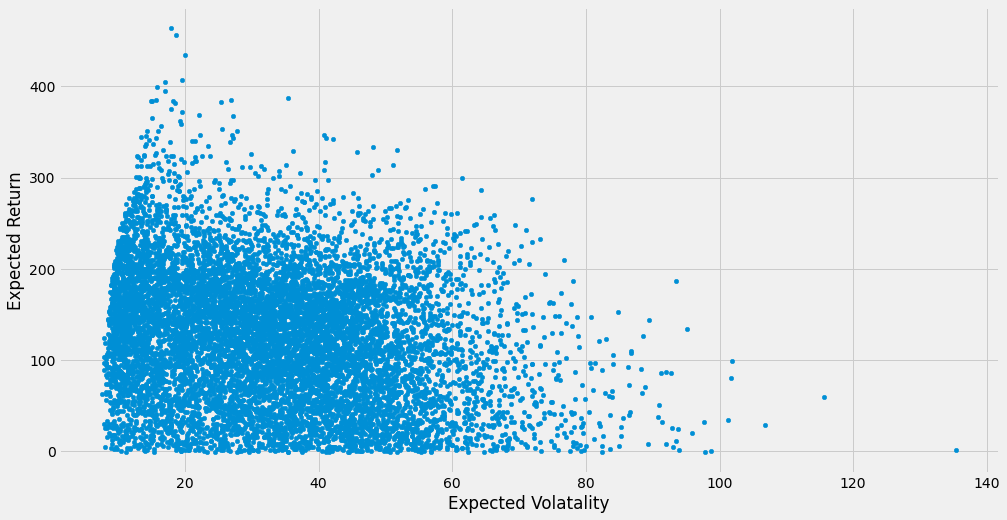

In [ ]:
portfolio.plot(x='Volatility',y='Return',kind='scatter',figsize=(15,8))
plt.xlabel('Expected Volatality')
plt.ylabel('Expected Return')